In [40]:
import surp
import arya
import matplotlib.pyplot as plt
import numpy as np

# Timestep convergence

In [41]:
mid = surp.ViceModel.from_saved("../../models/C11_f0.2/model.json")

In [42]:
low = surp.ViceModel.from_saved("../../models/C11_f0.2_dt0.05/model.json")
high = surp.ViceModel.from_saved("../../models/C11_f0.2_dt0.01/model.json")


In [49]:
models = [low, mid, high]
labels = ["dt=0.05", "dt=0.02", "dt=0.01"]

In [80]:
print("timestep \t dt \t dt_err \t \t n steps")

for i in range(3):
    model = models[i]
    ts = np.unique(model.history.time)
    dts = np.diff(ts)
    print(labels[i], "\t", np.mean(dts), "\t", np.std(dts), "\t", len(ts))

timestep 	 dt 	 dt_err 	 	 n steps
dt=0.05 	 0.05 	 5.851698501095728e-16 	 264
dt=0.02 	 0.02 	 5.356360389248432e-16 	 661
dt=0.01 	 0.01 	 4.263663964661644e-16 	 1321


(-1.0, 1.0)

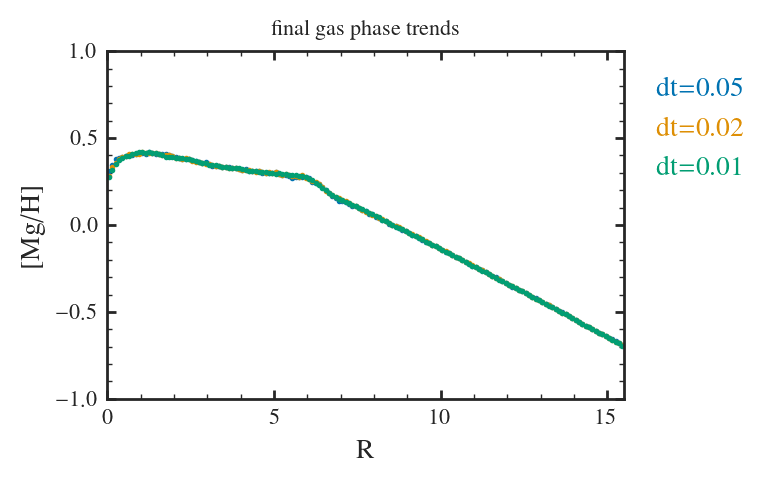

In [86]:
plt.figure()
for i in range(3):
    model = models[i]
    label = labels[i]
    t_end = np.max(model.history.time)
    h_end = model.history[model.history.time == t_end]
    plt.scatter(h_end.R, h_end.MG_H, s=1, label=label)

plt.xlabel("R")
plt.ylabel("[Mg/H]")
arya.Legend(loc=-1, color_only=True)
plt.title("final gas phase trends")
plt.xlim(0, 15.5)
plt.ylim(-1, 1)

Text(0.5, 1.0, 'final gas phase trends')

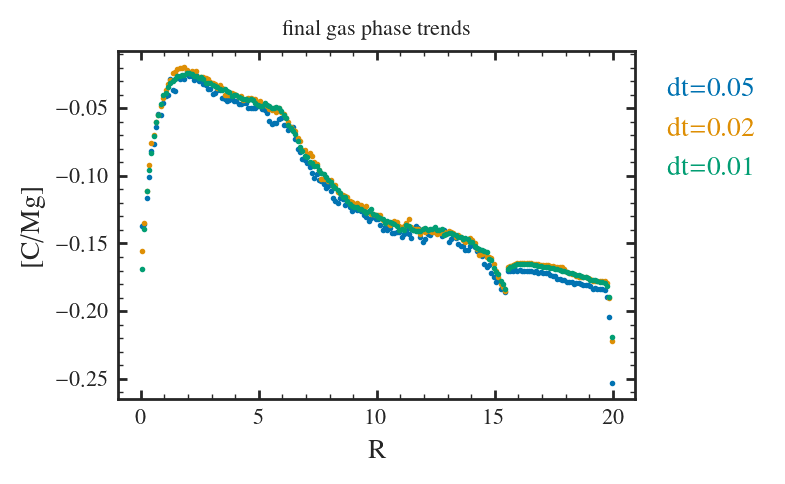

In [87]:
plt.figure()
for i in range(3):
    model = models[i]
    label = labels[i]
    t_end = np.max(model.history.time)
    h_end = model.history[model.history.time == t_end]
    plt.scatter(h_end.R, h_end.C_MG, s=1, label=label)

plt.xlabel("R")
plt.ylabel("[C/Mg]")
arya.Legend(loc=-1, color_only=True)
plt.title("final gas phase trends")

Text(0.5, 1.0, 'final gas phase trends')

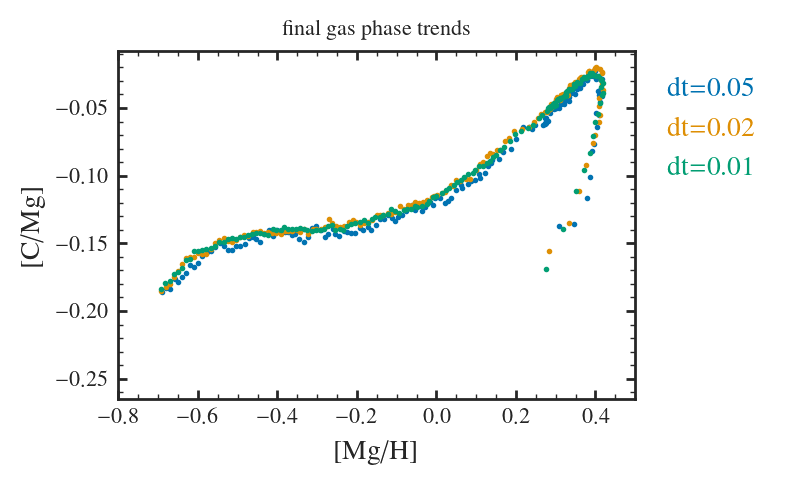

In [88]:
plt.figure()
for i in range(3):
    model = models[i]
    label = labels[i]
    t_end = np.max(model.history.time)
    h_end = model.history[model.history.time == t_end]
    plt.scatter(h_end.MG_H, h_end.C_MG, s=1, label=label)

plt.xlim(-0.8, 0.5)
plt.xlabel("[Mg/H]")
plt.ylabel("[C/Mg]")
arya.Legend(loc=-1, color_only=True)
plt.title("final gas phase trends")

Text(0.5, 1.0, 'final gas phase trends')

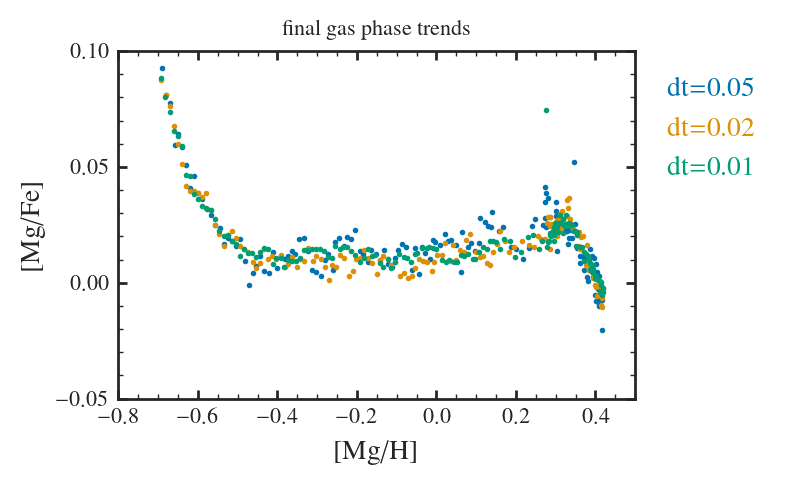

In [90]:
plt.figure()
for i in range(3):
    model = models[i]
    label = labels[i]
    t_end = np.max(model.history.time)
    h_end = model.history[model.history.time == t_end]
    plt.scatter(h_end.MG_H, h_end.MG_FE, s=1, label=label)

plt.xlim(-0.8, 0.5)
plt.ylim(-0.05, 0.10)
plt.xlabel("[Mg/H]")
plt.ylabel("[Mg/Fe]")
arya.Legend(loc=-1, color_only=True)
plt.title("final gas phase trends")

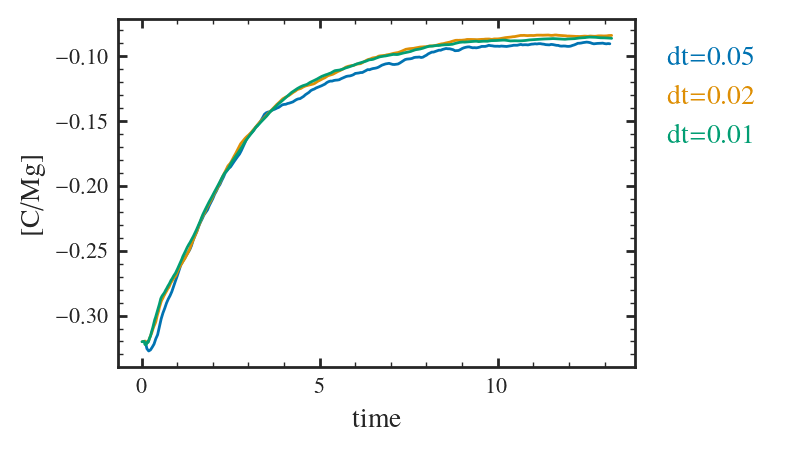

In [92]:
plt.figure()
R0 = 7.05
for i in range(3):
    model = models[i]
    label = labels[i]
    h = model.history[np.isclose(model.history.R, R0)]
    plt.plot(h.time, h.C_MG, label=label)
    
plt.xlabel("time")
plt.ylabel("[C/Mg]")
arya.Legend(loc=-1, color_only=True)


/users/PAS2232/aeyobd/arya/arya/plotting/medianplot.py:158: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, pd.DataFrame(
/users/PAS2232/aeyobd/arya/arya/plotting/medianplot.py:158: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, pd.DataFrame(
/users/PAS2232/aeyobd/arya/arya/plotting/medianplot.py:158: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empt

Text(0.5, 1.0, 'stars')

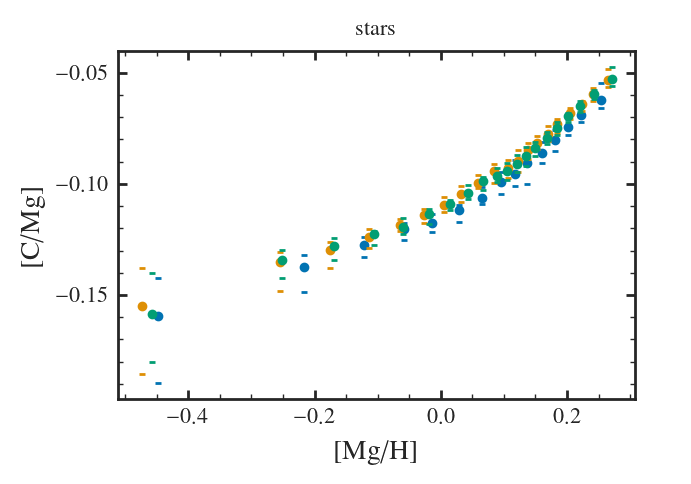

In [91]:
for i in range(3):
    model = models[i]
    label = labels[i]
    c = arya.COLORS[i]
    df = model.stars[~model.stars.high_alpha]
    arya.medianplot(df, "MG_H", "C_MG", binsize=500, color=c)
plt.xlabel("[Mg/H]")
plt.ylabel("[C/Mg]")
arya.Legend(loc=-1, color_only=True)
plt.title("stars")

Text(0.5, 0, 'R origin (sample)')

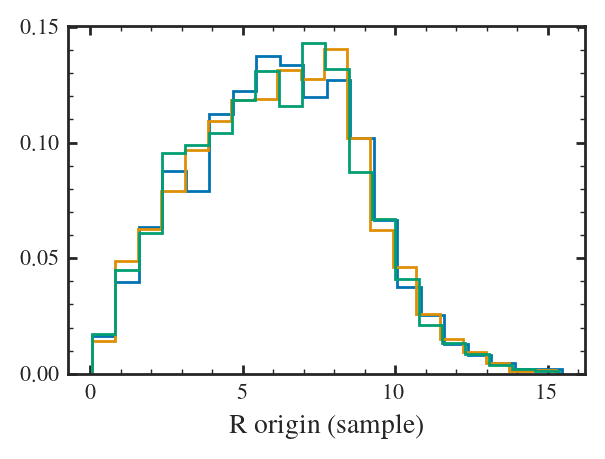

In [101]:
for i in range(3):
    model = models[i]
    label = labels[i]
    s = model.stars
    plt.hist(s.r_origin, 20, histtype="step", density=True)
    
plt.xlabel("R origin (sample)")

Everything converges (yay!)

# Zone width